<a href="https://colab.research.google.com/github/kaderdjb/clipboard-landing-page-master/blob/main/PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting up the data from kaggel** 

In [ ]:
 #Install kaggel
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aekdjabri","key":"3f2f7ccee2c4d07f07a70ff13a44a4e3"}'}

In [ ]:
#Create kaggel folder
! mkdir ~/.kaggle

In [ ]:
#copy kaggel.json to folder created 
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           7275        973  0.9375           
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           4747        124  1.0              
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1387        797  0.875            


In [ ]:
#Download Data
! kaggle datasets download -d solarmainframe/ids-intrusion-csv

 99% 1.59G/1.60G [00:35<00:00, 48.0MB/s]
100% 1.60G/1.60G [00:35<00:00, 48.7MB/s]


In [ ]:
#unzip the file
! mkdir ids-intrusion-csv 
! unzip ids-intrusion-csv.zip -d ids-intrusion-csv

Archive:  ids-intrusion-csv.zip
  inflating: ids-intrusion-csv/02-14-2018.csv  
  inflating: ids-intrusion-csv/02-15-2018.csv  
  inflating: ids-intrusion-csv/02-16-2018.csv  
  inflating: ids-intrusion-csv/02-20-2018.csv  
  inflating: ids-intrusion-csv/02-21-2018.csv  
  inflating: ids-intrusion-csv/02-22-2018.csv  
  inflating: ids-intrusion-csv/02-23-2018.csv  
  inflating: ids-intrusion-csv/02-28-2018.csv  
  inflating: ids-intrusion-csv/03-01-2018.csv  
  inflating: ids-intrusion-csv/03-02-2018.csv  


#  Loading the csv

In [ ]:
import pandas as pd # panda is liberary for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

data_frame1 = pd.read_csv('/content/ids-intrusion-csv/02-14-2018.csv')
data_frame2 = pd.read_csv('/content/ids-intrusion-csv/02-15-2018.csv')
data_frame3 = pd.read_csv('/content/ids-intrusion-csv/02-16-2018.csv')
data_frame4 = pd.read_csv('/content/ids-intrusion-csv/02-21-2018.csv')
data_frame5 = pd.read_csv('/content/ids-intrusion-csv/02-22-2018.csv')
data_frame6 = pd.read_csv('/content/ids-intrusion-csv/02-23-2018.csv')
data_frame7 = pd.read_csv('/content/ids-intrusion-csv/03-01-2018.csv')
data_frame8 = pd.read_csv('/content/ids-intrusion-csv/03-02-2018.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_frame5["Label"].value_counts()

Benign              1048213
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: Label, dtype: int64

In [ ]:
import numpy as np
import pandas as pd

#Correcting "the label error"
data_frame3.drop(data_frame3.index[(data_frame3["Label"] == "Label")],axis=0,inplace=True) #So i can delete rows where label = label is not nedded 
data_frame7.drop(data_frame7.index[(data_frame7["Label"] == "Label")],axis=0,inplace=True)


Appling sampling and stratified sampling on the **datasets**

In [ ]:
import numpy as np
import pandas as pd

# Applying Stratified Sampling on the dataset after regrouping the same labels
Instance=10000 #Number of instance 
Stratified_data_frame1=data_frame1.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance)) # Applying Stratified Sampling on the datasets
Stratified_data_frame2=data_frame2.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance))
Stratified_data_frame3=data_frame3.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance))
del data_frame1,data_frame2,data_frame3

#web attcks in these dataframes are less than 10000 hence we are randomly sampling the points here 

Stratified_data_frame4=data_frame4.head(Instance)
Stratified_data_frame5=data_frame5.head(Instance)
Stratified_data_frame6=data_frame6.head(Instance)
del data_frame4,data_frame5,data_frame6

Stratified_data_frame7=data_frame7.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance)) # Applying Stratified Sampling on the datasets
Stratified_data_frame8=data_frame8.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance))

del data_frame8,data_frame7

Concatenating the stratified samples we form our final dataset which hold the benign and web attack forming our final dataset

In [ ]:
import numpy as np
import pandas as pd
final_dataset = [
    Stratified_data_frame1, 
    Stratified_data_frame2,
    Stratified_data_frame3,
    Stratified_data_frame4, 
    Stratified_data_frame5,
    Stratified_data_frame6,
    Stratified_data_frame7,
    Stratified_data_frame8, 
    
]
final_dataset=pd.concat(final_dataset) #concatenate the Stratified samples
del Stratified_data_frame1,Stratified_data_frame2,Stratified_data_frame3,Stratified_data_frame4,Stratified_data_frame5,Stratified_data_frame6,Stratified_data_frame7,Stratified_data_frame8

we do not have enough amount individual web attack so can specify which type of attack it is. Therefore,we are making this problem from a multi class classification problem to a Binary Classification problem. Encoding all types of web attacks to be 0 and the Benign requests to be 1.

In [ ]:
import numpy as np
import pandas as pd

#Encoding all types of web attacks by the label web-attack
final_dataset.replace(to_replace=['Brute Force -Web','Brute Force -XSS','SQL Injection'],value='Web-attack',inplace=True)
#Class Labels and its corresponding counts
final_dataset['Label'].value_counts()

Benign                      71272
FTP-BruteForce              10000
SSH-Bruteforce              10000
DoS attacks-GoldenEye       10000
DoS attacks-Slowloris       10000
DoS attacks-Hulk            10000
DoS attacks-SlowHTTPTest    10000
Infilteration               10000
Bot                         10000
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Web-attack                    928
Name: Label, dtype: int64

#  **Data Cleaning** 

In [ ]:
import numpy as np
import pandas as pd

#Converting the feature datatypes
final_dataset['Timestamp'] = pd.to_datetime(final_dataset['Timestamp']).astype(np.int64)#converting the time stamps to int

columns=final_dataset.columns


for i in columns: #changing all the numerical features to float datatype
    if i != 'Label':
      final_dataset[i]=final_dataset[i].astype(float)
    
final_dataset =  final_dataset.drop_duplicates(keep="first")# Dropping the duplicates

final_dataset=final_dataset.replace([np.inf, -np.inf], np.nan) #Replacing the infinite values to NaN

final_dataset.replace(r'^\s*$', np.nan, regex=True)#converting the blank spaces into NaN values

final_dataset=final_dataset.replace(np.nan, 0) #Converting the NaN values to zeros

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


# Feature Importance

In [ ]:
import numpy as np
import pandas as pd

#putting names of the features in array
columns = final_dataset.columns
#dropping the constant features
for feature in columns: 
  if (final_dataset[feature] == 0).all():
      final_dataset.drop(feature,axis='columns',inplace=True)    


In [ ]:
#install library eli5 from github
! pip install git+https://github.com/eli5-org/eli5.git#egg=eli5

  Cloning https://github.com/eli5-org/eli5.git to /tmp/pip-install-tqf_iaq9/eli5_41bbc7c4845f462eb2e38a57f239ab3a
  Running command git clone -q https://github.com/eli5-org/eli5.git /tmp/pip-install-tqf_iaq9/eli5_41bbc7c4845f462eb2e38a57f239ab3a
     |████████████████████████████████| 133 kB 8.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5e2a3a3d12fc12235038c78e8a4b0f494e12ad93e776f9d09044d056a8451d3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2cvv_one/wheels/d0/7b/a9/1621aa31714960deabe06b27d771b06a22fdc184d0f074e6d9
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance

#Splitting the Xi and Yi to apply the Permutation Importance model and identify the important features to further apply model
y = final_dataset['Label'] 
X= final_dataset.drop(['Label'],axis=1)

#making the 80-20 split 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2) 

#Storing them as arrays to be used by .fit()
columns = X_train.columns
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)


sel = SelectFromModel(PermutationImportance(RandomForestClassifier(), cv=5)).fit(X_train, Y_train) #fitting permutation importance 
X_train2 = sel.transform(X_train) #applying permutation importance on the train 
X_test2 = sel.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train2,Y_train) #checking how the shuffled xi features affect the actual prediction values 
coefficients = model.feature_importances_
absCoefficients = abs(coefficients)
Perm_imp = pd.concat((pd.DataFrame(columns,columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
least_features=Perm_imp.iloc[50 :,0] #identify the least importance features in the dataset

#dropping the least important features
data=least_features.tolist()
for i in data:
    final_dataset.drop(labels=[i],axis=1,inplace=True)

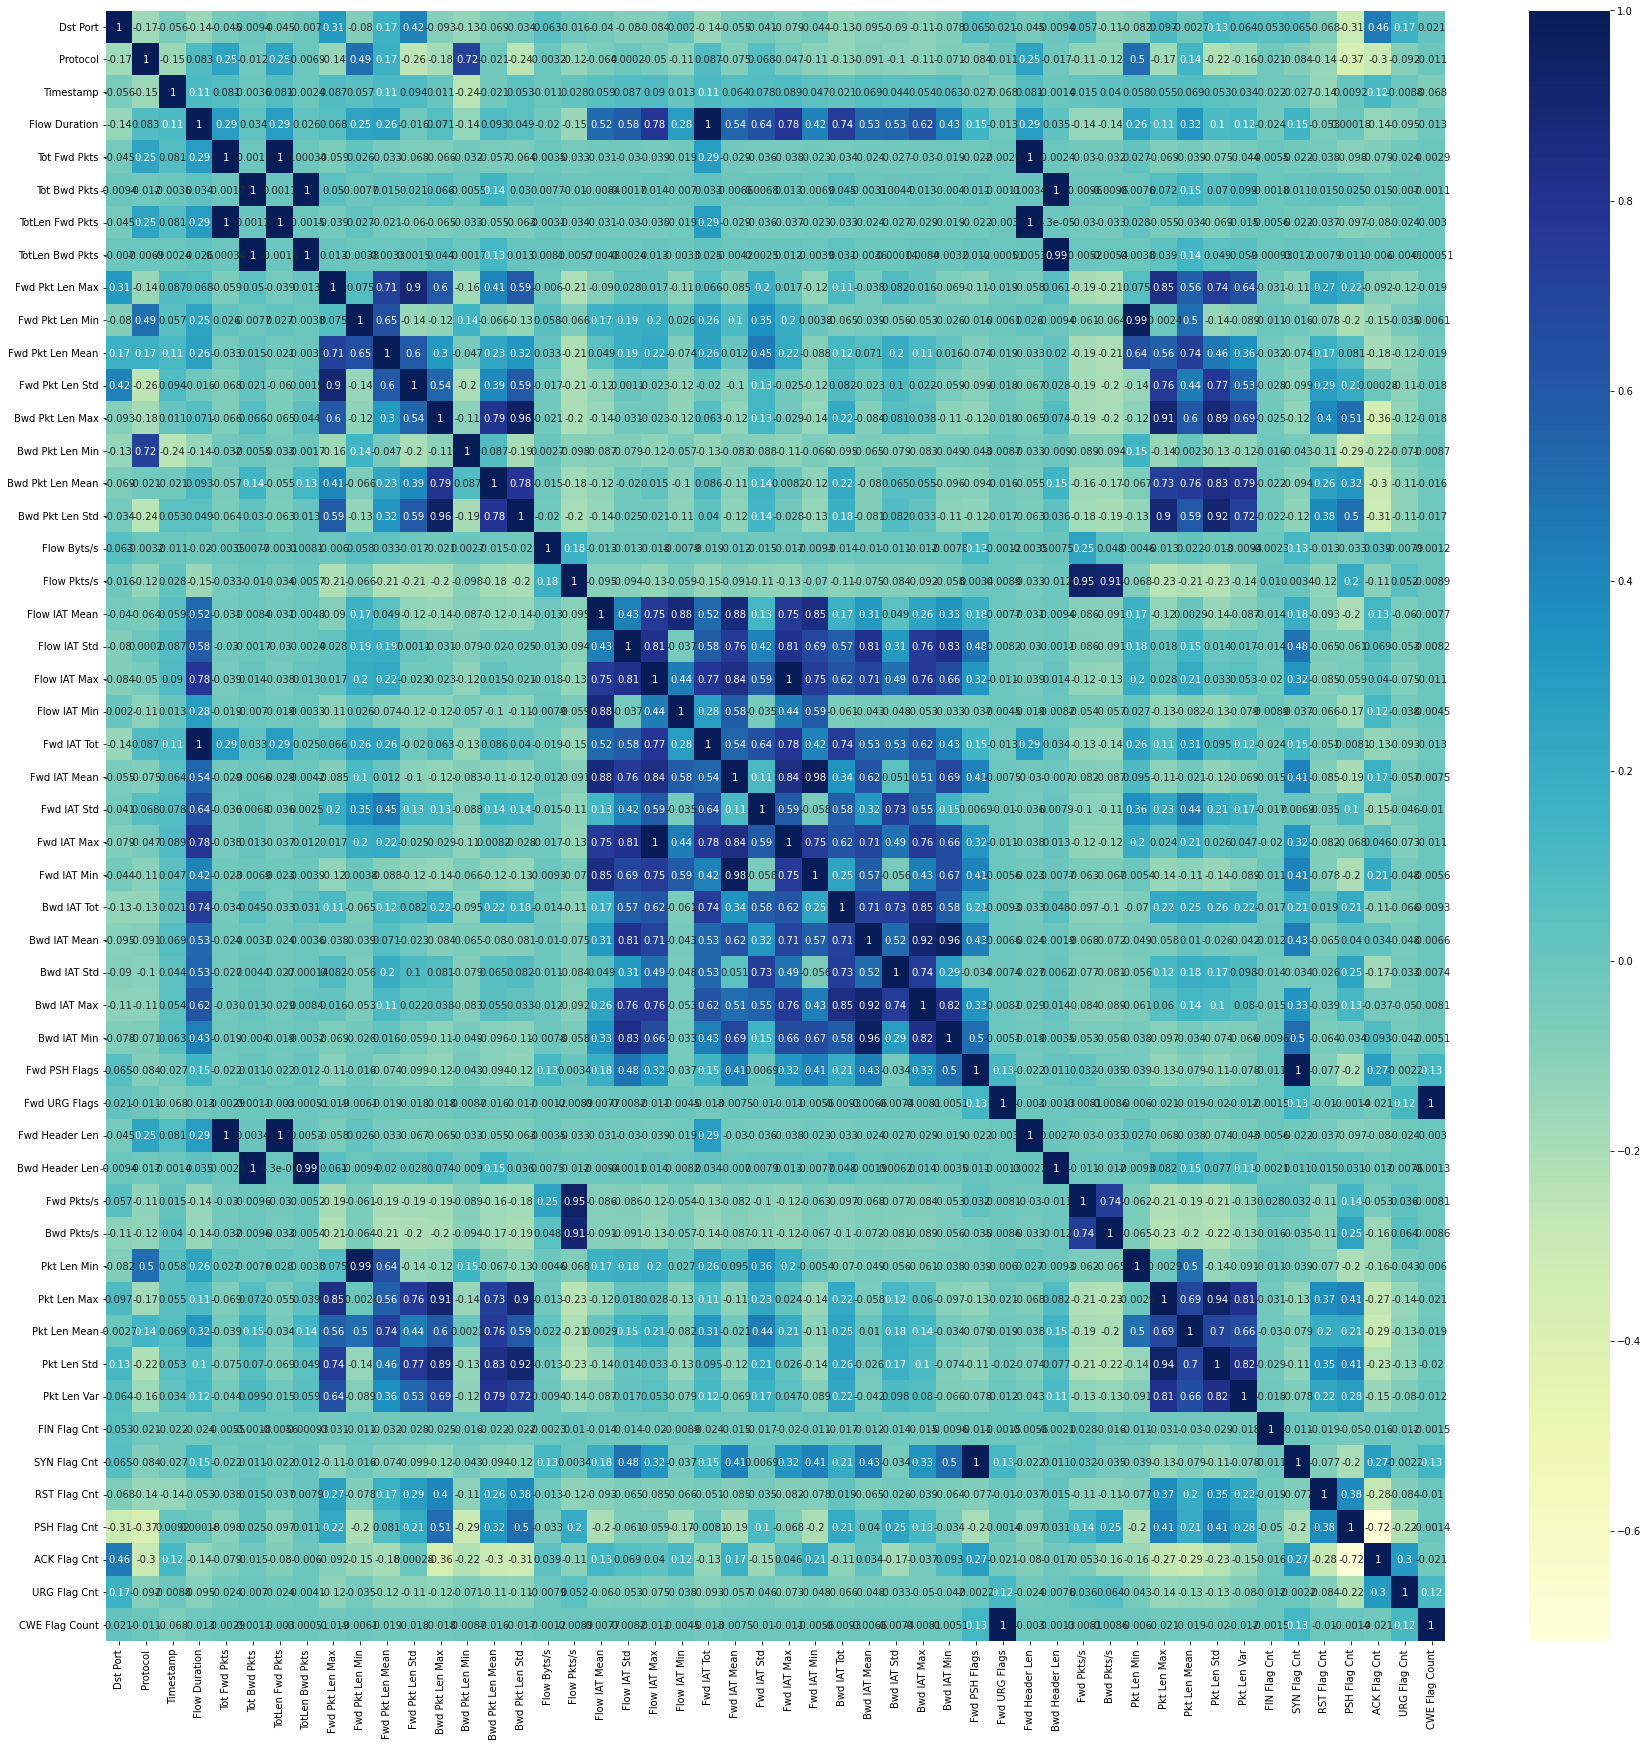

In [ ]:
from matplotlib import pyplot as plt  
import seaborn as sns

#Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
Y_Labels = final_dataset['Label'] 
X_data = final_dataset.drop(['Label'],axis=1)

#Create the correlation heatmap between the features
fig= plt.figure(figsize=(30,30))
sns.heatmap(X_data.corr(), annot=True,cmap="YlGnBu")

In [ ]:
#Findout the features with the correlation value greater than the threshold
def get_correlation_high(X_data,threshold): 
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
    
#spot the highly co realted features in the dataset 
corelated_features=get_correlation_high(X_data,0.95) 
corelated_features
corr=list(corelated_features)
for i in corr: #dropping the highly corelated features from the dataset 
  final_dataset.drop(labels=[i],axis=1,inplace=True)

In [ ]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'Label'],
      dtype='object')

# Models

**Decision tree**

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score ,classification_report ,precision_score ,recall_score , f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Replacing labels with numerical values 
final_dataset.replace(to_replace=['Benign','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DDOS attack-LOIC-UDP','Infilteration','Bot','Web-attack'],value=[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
#Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
Y_cleaned = final_dataset['Label'] 
X_cleaned= final_dataset.drop(['Label'],axis=1)

#making the 80-20 split 
X_train, X_test, Y_train, Y_test = train_test_split(X_cleaned, Y_cleaned, test_size=0.2) 

X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

#Initializing a decision tree with the default mode (without hyper-parameters)
DT_clf = DecisionTreeClassifier(random_state=0)
#Training the model on the 80% of the data 
DT_clf.fit(X_train, Y_train)
#Testing the model with the 20% left data (test data)
DT_pred=DT_clf.predict(X_test)



In [ ]:
print('the Confusion matrix')
print(confusion_matrix(Y_test,DT_pred))

the Confusion matrix
[[13946     2     0     1     0     1     0     0     0   180     3    17]
 [    1  1934     0     0     0     0     0     0     0     0     0     0]
 [    0     0  2132     0     0     0     0     0     0     0     0     0]
 [    0     0     0  1867     0     0     0     0     0     0     0     0]
 [    0     0     0     0  1187     0     0     0     0     0     0     0]
 [    1     0     0     0     0  1874     0     0     0     0     0     0]
 [    0     0     0     0     0     0  1597     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1161     0     0     0     0]
 [    0     0     0     0     0     0     0     0   366     0     0     0]
 [  185     0     0     0     0     0     0     0     0  1804     0     0]
 [    1     0     0     0     0     0     0     0     0     0  2010     0]
 [   25     0     0     0     0     0     0     0     0     0     0   156]]


In [ ]:
print('the Precision \n',precision_score(Y_test,DT_pred, average=None))

the Precision 
 [0.98495656 0.99896694 1.         0.99946467 1.         0.99946667
 1.         1.         1.         0.90927419 0.99850969 0.9017341 ]


In [ ]:
print('the Recall \n',recall_score(Y_test,DT_pred,average=None))

the Recall 
 [0.98558304 0.9994832  1.         1.         1.         0.99946667
 1.         1.         1.         0.90698844 0.99950273 0.86187845]


In [ ]:
print('the f1_score \n',f1_score(Y_test,DT_pred, average=None))

the f1_score 
 [0.9852697  0.99922501 1.         0.99973226 1.         0.99946667
 1.         1.         1.         0.90812988 0.99900596 0.88135593]


In [ ]:
print('the accuracy : ',accuracy_score(Y_test,DT_pred))


the accuracy :  0.9863058684443861


In [36]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV

#Initializing a decision tree with max_depth & min_samples_split hyper-parameters
parameters = {'max_depth':[10,30,50,100],'min_samples_split':[5,10,50,100]}

#Finding which value of the hyperparameters gives the best result
DTclf= GridSearchCV(DT(),parameters)
DTclf.fit(X_train, Y_train)

print('Best score: ',DTclf.best_score_)
print('Parameters with best score: ',DTclf.best_params_)None

SyntaxError: ignored

Random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Initializing a Random Forest classifier with  the default mode and Training the model on the 80% of the data 
RF_model = RandomForestClassifier(random_state=0).fit(X_train, Y_train)
#Testing the model with the 20% left data (test data)
RF_pred=RF_model.predict(X_test)
print('the accuracy of RF model',accuracy_score(Y_test,RF_pred))

the accuracy of RF model 0.9829985558618879


In [29]:
print('the Confusion matrix')
print(confusion_matrix(Y_test,RF_pred))

the Confusion matrix
[[14072     1     0     0     0     2     0     2     0   206     1    19]
 [    2  1972     0     0     0     0     0     0     0     0     0     0]
 [    5     0  1999     0     0     0     0     0     0     0     0     0]
 [    3     0     0  1860     0     0     0     0     0     0     0     0]
 [    0     0     0     0  1180     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1901     0     0     0     0     0     0]
 [    0     0     0     0     0     0  1537     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1166     0     0     0     0]
 [    0     0     0     0     0     0     0     0   339     0     0     0]
 [  241     0     0     0     0     0     0     0     0  1757     0     0]
 [    1     0     0     0     0     0     0     0     0     0  1996     0]
 [   34     0     0     0     0     0     0     1     0     0     0   171]]


In [30]:
print('the Precision \n',precision_score(Y_test,RF_pred, average=None))

the Precision 
 [0.98008079 0.99949316 1.         1.         1.         0.99894903
 1.         0.9974337  1.         0.89505858 0.99949925 0.9       ]


In [31]:
print('the Recall \n',recall_score(Y_test,RF_pred,average=None))

the Recall 
 [0.98384954 0.99898683 0.99750499 0.99838969 1.         1.
 1.         1.         1.         0.87937938 0.99949925 0.83009709]


In [32]:
print('the f1_score \n',f1_score(Y_test,RF_pred, average=None))

the f1_score 
 [0.98196155 0.99923993 0.99875094 0.9991942  1.         0.99947424
 1.         0.9987152  1.         0.88714971 0.99949925 0.86363636]


In [33]:
print('the accuracy : ',accuracy_score(Y_test,RF_pred))


the accuracy :  0.9829985558618879


In [37]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV

#Initializing the Random Forest decision trees with max_depth & min_samples_split hyper-parameters
parameters = {'max_depth':[10,20,50,100],'min_samples_split':[10,15,20,30]}
#Finding which value of the hyperparameters gives the best result
RFclf= GridSearchCV(RF(),parameters)
RFclf.fit(X_train, Y_train)

print('Best score: ',RFclf.best_score_)
print('Parameters with best score: ',RFclf.best_params_)

Best score:  0.9839828047015438
Parameters with best score:  {'max_depth': 100, 'min_samples_split': 10}


The k-Nearest Neighbors (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


#Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
Y_cleaned = final_dataset['Label'] 
X_cleaned= final_dataset.drop(['Label'],axis=1)
# creating object so we can fit and transform the data for the model
X = StandardScaler().fit(X_cleaned).transform(X_cleaned.astype(float))
#making the 80-20 split 
X_train, X_test, Y_train, Y_test = train_test_split(X_cleaned, Y_cleaned, test_size=0.2) 
#Initializing a K Nearest Neighbors Classifier with the default mode
knn_model = KNeighborsClassifier(n_neighbors=3)
#Training the model on the 80% of the data 
knn_model.fit(X_train, Y_train)
#Testing the model with the 20% left data (test data)
KNN_pred = knn_model.predict(X_test)

print('the accuracy',accuracy_score(Y_test,KNN_pred))

the accuracy 0.8269016210540132


In [ ]:

#Initializing a K Nearest Neighbors Classifier with 10 possibilitys for k 
k=1
while k < 10 :
  knn_model = KNeighborsClassifier(n_neighbors=k)
  #Training the model on the 80% of the data 
  knn_model.fit(X_train, Y_train)
  #Testing the model with the 20% left data (test data)
  KNN_pred = knn_model.predict(X_test)
  print('with k = ',k,'the accuracy',accuracy_score(Y_test,KNN_pred))
  k+=1

with k =  1 the accuracy 0.8099691540329461
with k =  2 the accuracy 0.7847673426527532
with k =  3 the accuracy 0.8269016210540132
with k =  4 the accuracy 0.8154492354137953
with k =  5 the accuracy 0.8348100019688915
with k =  6 the accuracy 0.8284439194067074
with k =  7 the accuracy 0.8388790444313186
with k =  8 the accuracy 0.8329723698890857
with k =  9 the accuracy 0.8420949005709786


XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


#Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
Y_cleaned = final_dataset['Label']
X_cleaned= final_dataset.drop(['Label'],axis=1)
# creating object so we can fit and transform the data for the model
Encoder = LabelEncoder() 
Encoder = Encoder.fit(Y_cleaned) 
Encoded_Y = Encoder.transform(Y_cleaned)

#Making the 80-20 split 
X_train, X_test, Y_train, Y_test = train_test_split(X_cleaned,Encoded_Y,test_size=0.2,random_state=42)

#Initializing a XGB Classifier  with the default mode
XGB = XGBClassifier(objective='multi:softprob')
#Training the model on the 80% of the data 
XGB.fit(X_train,Y_train)
#Testing the model with the 20% left data (test data)
XGB_preds = XGB.predict(X_test)

print("Accuracy",accuracy_score(Y_test,XGB_preds))
print(classification_report(Y_test,XGB_preds))

In [ ]:
from xgboost import XGBClassifier
#Initializing a XGB Classifier  with the default mode
XGB = XGBClassifier(booster='gbtree',objective='multi:softprob',eta=0.2,max_depth=50)
#Training the model on the 80% of the data 
XGB.fit(X_train,Y_train)
#Testing the model with the 20% left data (test data)
XGB_preds = XGB.predict(X_test)

print("Accuracy",accuracy_score(Y_test,XGB_preds))
print(classification_report(Y_test,XGB_preds))

In [ ]:
pip install xgboost==1.6.0

In [ ]:
XGB.save_model('XGB_classifier.json')

Support-vector machine

In [ ]:
from sklearn import svm

#Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
Y_cleaned = final_dataset['Label'] 
X_cleaned= final_dataset.drop(['Label'],axis=1)
#Making the 80-20 split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_cleaned, test_size=0.2,random_state=101) 
#Initializing a SVM Classifier with the RBF kernel and train the model 
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, Y_train)
#Initializing a SVM Classifier with the POLY kernel and train the model
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train)
#testing the model with the 20% left data 
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

print("POLY Accuracy",accuracy_score(Y_test,poly_pred))
print("RBF Accuracy",accuracy_score(Y_test,rbf_pred))


POLY Accuracy 0.8615541117017785
RBF Accuracy 0.921277154295465


Multi-layer Perceptron

In [ ]:
from sklearn.preprocessing import StandardScaler
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Encoding the labels to numiric values
final_dataset.replace(to_replace=['Benign','Infilteration','Bot','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DoS attacks-SlowHTTPTest','DDOS attack-LOIC-UDP','Web-attack'],value=[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
##Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
y = final_dataset['Label'] 
X= final_dataset.drop(['Label'],axis=1)
#fitting and transform the data for the model
scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)
#classifying the predictors and target variables as X and Y
X_train, X_val, Y_train, y_val= train_test_split(X,y, test_size = 0.2, random_state = 21)
#Initializing the MLPClassifier
MLP_classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
#Fitting the training data to the network
MLP_classifier.fit(X_train, Y_train)
#Predicting y for X_val
y_pred = MLP_classifier.predict(X_val)

print("Accuracy",accuracy_score(y_pred, y_val))

Accuracy 0.9464133359585221


In [ ]:
 import joblib

joblib.dump(MLP_classifier, 'MLP_classifier.pkl')

['MLP_classifier.pkl']

# *For testing and printing results*





# Testing 


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADA = AdaBoostClassifier(DecisionTreeClassifier(random_state=0))
ADA.fit(X_train_XGB,Y_train)
ADA_preds = ADA.predict(X_test_XGB)

print("Accuracy",accuracy_score(Y_test,ADA_preds))
print(classification_report(Y_test,XGB_preds))

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Bwd Pkts/s', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Var', 'FIN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt'],
      dtype='object')

In [ ]:
columns = ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Label']

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
columns = ['TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd IAT Tot',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'SYN Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

final_dataset.drop(columns, inplace=True, axis=1)
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Label'],
      dtype='object')

n_estimators=100,learning_rate=0.1

In [ ]:
final_dataset['Label'].value_counts()

Benign                      71255
Infilteration               10000
DoS attacks-GoldenEye        9997
Bot                          9992
DoS attacks-Hulk             9989
DoS attacks-Slowloris        9378
SSH-Bruteforce               9287
FTP-BruteForce               7718
DDOS attack-HOIC             6035
DoS attacks-SlowHTTPTest     5986
DDOS attack-LOIC-UDP         1730
Web-attack                    928
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
data_for_test = final_dataset
Benign = final_dataset.loc[final_dataset['Label'] == 	"Benign"]
Infilteration = final_dataset.loc[final_dataset['Label'] == "Infilteration"]
DoS_attacks_GoldenEye = final_dataset.loc[final_dataset['Label'] == "DoS attacks-GoldenEye"]
Bot = final_dataset.loc[final_dataset['Label'] == "Bot"]
DoS_attacks_Hulk = final_dataset.loc[final_dataset['Label'] == "DoS attacks-Hulk"]
DoS_attacks_Slowloris = final_dataset.loc[final_dataset['Label'] == "DoS attacks-Slowloris"]
SSH_Bruteforce = final_dataset.loc[final_dataset['Label'] == "SSH-Bruteforce"]
FTP_BruteForce = final_dataset.loc[final_dataset['Label'] == "FTP-BruteForce"]
DDOS_attack_HOIC = final_dataset.loc[final_dataset['Label'] == "DDOS attack-HOIC"]
DoS_attacks_SlowHTTPTest = final_dataset.loc[final_dataset['Label'] == "DoS attacks-SlowHTTPTest"]
DDOS_attack_LOIC_UDP = final_dataset.loc[final_dataset['Label'] == "DDOS attack-LOIC-UDP"]
Web_attack = final_dataset.loc[final_dataset['Label'] == "Web-attack"]

In [ ]:
data_for_test['Label'].value_counts()

Benign                      71255
Infilteration               10000
DoS attacks-GoldenEye        9997
Bot                          9992
DoS attacks-Hulk             9989
DoS attacks-Slowloris        9378
SSH-Bruteforce               9287
FTP-BruteForce               7718
DDOS attack-HOIC             6035
DoS attacks-SlowHTTPTest     5986
DDOS attack-LOIC-UDP         1730
Web-attack                    928
Name: Label, dtype: int64

In [ ]:
Benign['Label'].value_counts()
Infilteration['Label'].value_counts()
DoS_attacks_GoldenEye['Label'].value_counts()
Bot['Label'].value_counts()
DoS_attacks_Hulk['Label'].value_counts()
DoS_attacks_Slowloris['Label'].value_counts()
SSH_Bruteforce['Label'].value_counts()
FTP_BruteForce['Label'].value_counts()
DDOS_attack_HOIC['Label'].value_counts()
DoS_attacks_SlowHTTPTest['Label'].value_counts()
DDOS_attack_LOIC_UDP['Label'].value_counts()
Web_attack['Label'].value_counts()

Web-attack    928
Name: Label, dtype: int64

In [ ]:
Benign=	Benign.head(10000)

In [ ]:
data_for_test = [
    Benign, 
    Infilteration,
    DoS_attacks_GoldenEye,
    Bot, 
    DoS_attacks_Hulk,
    DoS_attacks_Slowloris,
    SSH_Bruteforce,
    FTP_BruteForce,
    DDOS_attack_HOIC,
    DoS_attacks_SlowHTTPTest,
    Web_attack
]
data_for_test=pd.concat(data_for_test) #concatenate the Stratified samples

In [ ]:

data_for_test['Label'].value_counts()

Benign                      10000
Infilteration               10000
DoS attacks-GoldenEye        9997
Bot                          9992
DoS attacks-Hulk             9989
DoS attacks-Slowloris        9378
SSH-Bruteforce               9287
FTP-BruteForce               7718
DDOS attack-HOIC             6035
DoS attacks-SlowHTTPTest     5986
Web-attack                    928
Name: Label, dtype: int64

In [ ]:
columns = ['TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd IAT Tot',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'SYN Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

data_for_test.drop(columns, inplace=True, axis=1)
data_for_test

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Label
635974,443.0,6.0,1.518597e+18,118492338.0,20.0,20.0,261.0,0.0,59.500000,77.957141,...,0.168787,1430.0,163.682927,119033.971951,0.0,0.0,1.0,0.0,0.0,Benign
789159,443.0,6.0,1.518601e+18,10257948.0,11.0,16.0,670.0,0.0,109.363636,200.710873,...,1.559766,1460.0,258.250000,215611.009259,0.0,0.0,1.0,0.0,0.0,Benign
751572,53.0,17.0,1.518574e+18,421.0,1.0,1.0,40.0,40.0,40.000000,0.000000,...,2375.296912,56.0,45.333333,85.333333,0.0,0.0,0.0,0.0,0.0,Benign
841281,3389.0,6.0,1.518601e+18,1132544.0,8.0,7.0,677.0,0.0,143.500000,228.129662,...,6.180775,1173.0,170.562500,102037.595833,0.0,1.0,1.0,0.0,0.0,Benign
899401,53.0,17.0,1.518582e+18,245.0,1.0,1.0,37.0,37.0,37.000000,0.000000,...,4081.632653,53.0,42.333333,85.333333,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,80.0,6.0,1.519356e+18,46.0,2.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,Web-attack
1998,80.0,6.0,1.519383e+18,277.0,2.0,1.0,0.0,0.0,0.000000,0.000000,...,3610.108303,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,Web-attack
2115,80.0,6.0,1.519381e+18,331.0,2.0,1.0,0.0,0.0,0.000000,0.000000,...,3021.148036,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,Web-attack
2216,80.0,6.0,1.519355e+18,313.0,2.0,1.0,0.0,0.0,0.000000,0.000000,...,3194.888179,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,Web-attack


In [ ]:
final_dataset = data_for_test
final_dataset["Label"].value_counts()

Benign                      10000
Infilteration               10000
DoS attacks-GoldenEye        9997
Bot                          9992
DoS attacks-Hulk             9989
DoS attacks-Slowloris        9378
SSH-Bruteforce               9287
FTP-BruteForce               7718
DDOS attack-HOIC             6035
DoS attacks-SlowHTTPTest     5986
Web-attack                    928
Name: Label, dtype: int64

In [ ]:
print(final_dataset.dtypes)

Dst Port            float64
Protocol            float64
Timestamp           float64
Flow Duration       float64
Tot Fwd Pkts        float64
Tot Bwd Pkts        float64
Fwd Pkt Len Max     float64
Fwd Pkt Len Min     float64
Fwd Pkt Len Mean    float64
Fwd Pkt Len Std     float64
Bwd Pkt Len Max     float64
Bwd Pkt Len Min     float64
Bwd Pkt Len Mean    float64
Flow Byts/s         float64
Flow Pkts/s         float64
Flow IAT Mean       float64
Flow IAT Std        float64
Flow IAT Max        float64
Flow IAT Min        float64
Fwd IAT Mean        float64
Fwd IAT Std         float64
Bwd IAT Tot         float64
Bwd IAT Mean        float64
Bwd IAT Std         float64
Bwd IAT Max         float64
Fwd PSH Flags       float64
Fwd URG Flags       float64
Bwd Pkts/s          float64
Pkt Len Max         float64
Pkt Len Mean        float64
Pkt Len Var         float64
FIN Flag Cnt        float64
RST Flag Cnt        float64
PSH Flag Cnt        float64
ACK Flag Cnt        float64
URG Flag Cnt        

In [ ]:
columns = ['TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd IAT Tot',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'SYN Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

#data_frame5.drop(columns, inplace=True, axis=1)
#Encoding all types of web attacks by the label web-attack
#data_frame5.replace(to_replace=['Brute Force -Web','Brute Force -XSS','SQL Injection'],value='Web-attack',inplace=True)
def Cleaning_data(df:object):
    #Converting the feature datatypes
    df['Timestamp'] = pd.to_datetime(df['Timestamp']).values.astype(np.int64)#converting the time stamps to int
    columns=df.columns
    df=df.drop_duplicates(keep="first") #Dropping the duplicates
    df=df.replace([np.inf, -np.inf], np.nan) #Replacing the infinite values to NaN
    df.replace(r'^\s*$', np.nan, regex=True)#converting the blank spaces into NaN values
    df=df.replace(np.nan, 0) #Converting the NaN values to zeros
    for i in columns: #changing all the numerical features to float datatype
    	if i != 'Label':
           df[i]=df[i].astype(float)

    return df
data_frame5 = Cleaning_data(data_frame5
                            )
Y_cleaned = data_frame5['Label']
X_cleaned= data_frame5.drop(['Label'],axis=1)

Encoder = LabelEncoder() 

lc = Encoder.fit(Y_cleaned) 

lc_y = lc.transform(Y_cleaned)

scaler = StandardScaler()
X_train_XGB = scaler.fit_transform(X_cleaned)


XGB_preds = XGB.predict(X_train_XGB)

print("Accuracy",accuracy_score(lc_y ,XGB_preds))
print(classification_report(lc_y ,XGB_preds))


Accuracy 0.00034649537160671436


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00   1044385
           1       0.00      1.00      0.00       362

    accuracy                           0.00   1044747
   macro avg       0.00      0.50      0.00   1044747
weighted avg       0.00      0.00      0.00   1044747



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd 
data_frame3 = pd.read_csv('/content/ids-intrusion-csv/02-22-2018.csv')
data_frame3[data_frame3["Label"] != "Benign"]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
893429,52695.0,6.0,1.518583e+18,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
670774,80.0,6.0,1.518605e+18,106.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
757055,443.0,6.0,1.518613e+18,118079815.0,15.0,18.0,1099.0,5844.0,344.0,0.0,...,20.0,170817.5,131726.21516,263962.0,77673.0,58830209.5,26944.303897,58849262.0,58811157.0,Benign
957998,80.0,6.0,1.518574e+18,925.0,3.0,4.0,161.0,488.0,161.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1023650,80.0,6.0,1.518603e+18,4590825.0,4.0,4.0,97.0,232.0,97.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263925,8080.0,6.0,1.517625e+18,629.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Bot
87615,8080.0,6.0,1.517630e+18,10097.0,3.0,4.0,326.0,129.0,326.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Bot
281538,8080.0,6.0,1.517653e+18,495.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Bot
189184,8080.0,6.0,1.517625e+18,10648.0,3.0,4.0,326.0,129.0,326.0,0.0,...,20.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,Bot
